In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#LOESS in Python

In [5]:
N_SAMPLES = 200

In [6]:
input_range = np.linspace(0, 2*np.pi, N_SAMPLES)

In [7]:
signal = np.sin(input_range)
noise = np.random.normal(0, 0.15, N_SAMPLES)
measurements = signal + noise

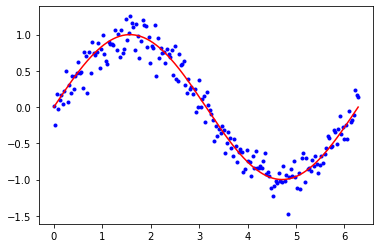

In [8]:
plt.plot(input_range, measurements, 'b.')
plt.plot(input_range, signal, 'r-')

In [9]:
from statsmodels.nonparametric.smoothers_lowess import lowess
filtered = lowess(measurements, input_range, frac=0.2)

In [10]:
filtered[:, 1]
#every row and second column -> all y values

array([-0.02179925,  0.00754109,  0.03679725,  0.06596848,  0.09505022,
        0.12404078,  0.15293889,  0.18174217,  0.21045258,  0.23906978,
        0.26758593,  0.29599684,  0.32429983,  0.35249712,  0.38059088,
        0.40859162,  0.43651421,  0.4643657 ,  0.49210488,  0.51956138,
        0.54310056,  0.56574512,  0.58766714,  0.60888559,  0.62948033,
        0.64943864,  0.66879097,  0.68747935,  0.70534086,  0.72230574,
        0.73843431,  0.75381397,  0.76864122,  0.7830938 ,  0.79730695,
        0.81122671,  0.82480402,  0.83796949,  0.8506188 ,  0.86267883,
        0.87420892,  0.88526038,  0.89590407,  0.90613833,  0.91584752,
        0.92485152,  0.93284972,  0.93966121,  0.94533821,  0.94989939,
        0.95334406,  0.95562036,  0.95658582,  0.95609739,  0.95417381,
        0.95090274,  0.94638268,  0.94064076,  0.93374638,  0.92579175,
        0.91673074,  0.90649494,  0.89499545,  0.88214093,  0.86805937,
        0.85296837,  0.83724121,  0.82118545,  0.80480018,  0.78

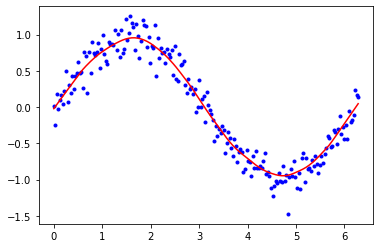

In [11]:
plt.plot(input_range, measurements, 'b.')
plt.plot(filtered[:, 0], filtered[:,1], 'r-')

In [12]:
#CMPT 353, week 3 part1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
%config InlineBackend.figure_format = 'svg'

#np.random.seed(3) #uncomment to get exactly the results from lecture slides

In [13]:
n_samples = 25

input_range = np.linspace(0, 2*np.pi, n_samples, dtype = np.float)
observations = pd.DataFrame()
observations['sin'] = (np.sin(input_range)) + np.random.normal(0, 0.5, n_samples)
observations['cos'] = (np.cos(input_range)) + np.random.normal(0, 0.25, n_samples)



In [23]:
from pykalman import KalmanFilter
initial_value_guess = observations.iloc[0]
observation_covariance = np.diag([0.5, 0.25])**2

In [26]:
kf = KalmanFilter(
    initial_state_mean = initial_value_guess,
    initial_state_covariance = observation_covariance,
    observation_covariance = observation_covariance
)
pred_state, state_cov = kf.smooth(observations)

In [27]:
delta_t = np.pi*2 / n_samples
transition_matrix = [[1, delta_t], [-delta_t, 1]]

ValueError: x and y can be no greater than 2-D, but have shapes (25, 2) and (25, 2, 2)

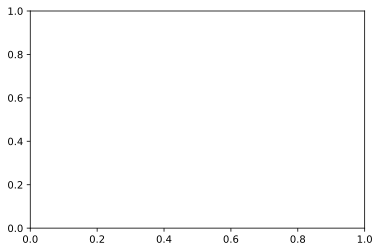

In [30]:
transition_covariance = np.diag([0.2, 0.2])**2
kf = KalmanFilter(
    initial_state_mean = initial_value_guess,
    initial_state_covariance = observation_covariance,
    observation_covariance = observation_covariance,
    transition_covariance = transition_covariance,
    transition_matrices = transition_matrix
)
pred_state, state_cov = kf.smooth(observations)
